## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

## Functions to Plot

In [56]:
def plot_regression(ax, X, y, y_pred, mse):
    ax.scatter(X, y, color='black', label='Actual')
    ax.scatter(X, y_pred, color='red', label='Predicted')
    sorted_indices = X[:, 0].argsort()
    ax.plot(X[sorted_indices], y_pred[sorted_indices], color='blue', linewidth=2, label='Regression Line')
    ax.set_title(f'KNN Regression (K = 32) \nMean Squared Error: {mse:.2f}')
    ax.set_xlabel('Average Number of Rooms')
    ax.set_ylabel('House Price')

def plot_mse(ax, X_train, y_train, X_test, y_test):
    mse_values = []
    for k in range(1, 41):
        knn_regressor = KNeighborsRegressor(n_neighbors=k)
        knn_regressor.fit(X_train, y_train)
        y_pred = knn_regressor.predict(X_test)
        mse_values.append(mean_squared_error(y_test, y_pred))
    
    ax.plot(range(1, 41), mse_values, label="MSE")
    ax.hlines(mse_values[31], 1, 40, color='red', linestyle='dashed', label="min MSE")
    ax.scatter(32, mse_values[31], color='red')
    ax.set_title('Mean Squared Error for Different Values of k')
    ax.set_xlabel('k')
    ax.set_ylabel('Mean Squared Error')
    ax.set_xticks(range(1, 41))

## Implementation of Regression with KNN

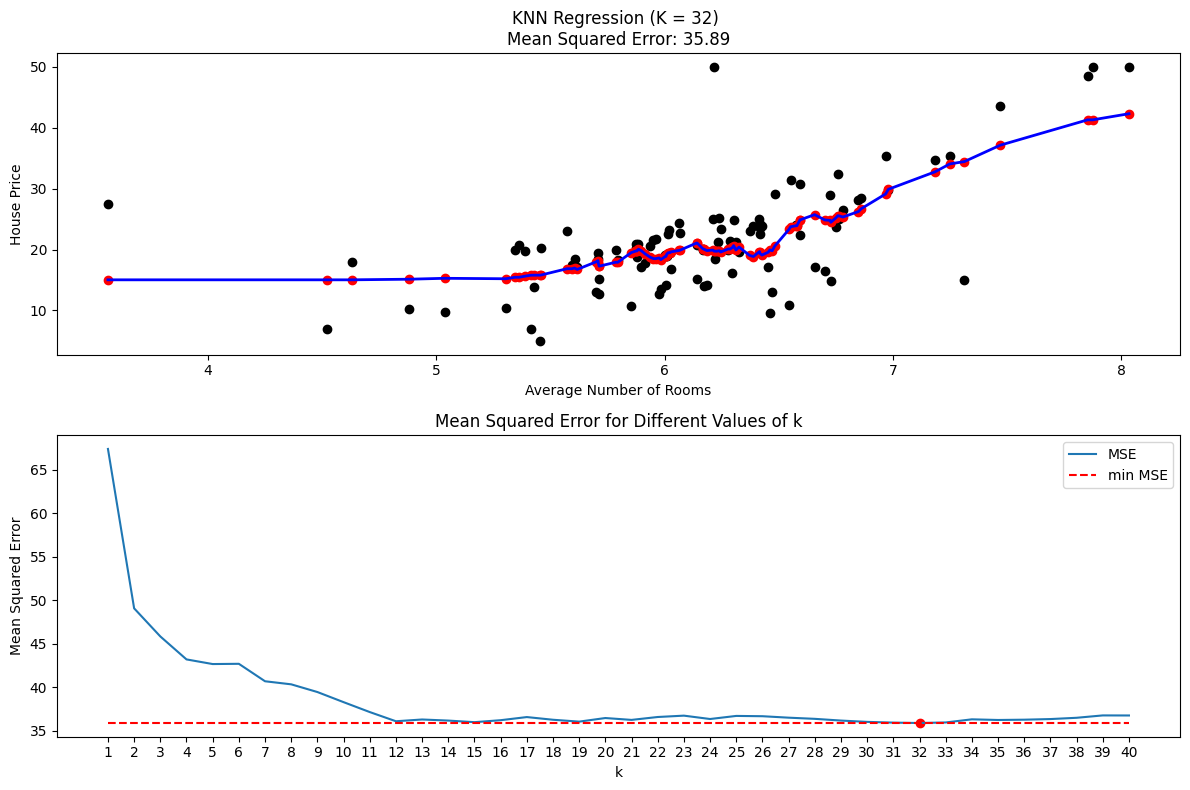

In [57]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

# Use only one feature for simplicity (e.g., average number of rooms per dwelling)
X = X[:, np.newaxis, 5]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regressor with k=5
knn_regressor = KNeighborsRegressor(n_neighbors=32)

# Train the regressor on the training data
knn_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Plot the regression line
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_regression(ax[0], X_test, y_test, y_pred, mse)
plot_mse(ax[1], X_train, y_train, X_test, y_test)
plt.legend()
plt.tight_layout()
plt.show()
